In [2]:
import os
data_path = ['../data']

# Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number.

We will not be using them, so they can be dropped from the data.

In [3]:
import pandas as pd
fileName = ['Orange_Telecom_Churn_Data.csv']
fileurl = os.sep.join(data_path+fileName)
df = pd.read_csv(fileurl)
df.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [4]:
df.drop(['state','phone_number','area_code'],axis=1,inplace=True)
df.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

# Question 2
Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods odf sklearn.
Finally, K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods.

In [5]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
for col in ['intl_plan', 'voice_mail_plan','churned']:
    df[col] = lb.fit_transform(df[col])
df.head(1).T

,0
account_length,128.00
intl_plan,0.00
voice_mail_plan,1.00
number_vmail_messages,25.00
total_day_minutes,265.10
total_day_calls,110.00
total_day_charge,45.07
total_eve_minutes,197.40
total_eve_calls,99.00
total_eve_charge,16.78


In [6]:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
minmax = MinMaxScaler()

df = pd.DataFrame(minmax.fit_transform(df),columns=df.columns)
df.head().T

,0,1,2,3,4
account_length,0.524793,0.438017,0.561983,0.342975,0.305785
intl_plan,0.000000,0.000000,0.000000,1.000000,1.000000
voice_mail_plan,1.000000,1.000000,0.000000,0.000000,0.000000
number_vmail_messages,0.480769,0.500000,0.000000,0.000000,0.000000
total_day_minutes,0.754196,0.459744,0.692461,0.851778,0.474253
total_day_calls,0.666667,0.745455,0.690909,0.430303,0.684848
total_day_charge,0.754183,0.459672,0.692436,0.851740,0.474230
total_eve_minutes,0.542755,0.537531,0.333242,0.170195,0.407754
total_eve_calls,0.582353,0.605882,0.647059,0.517647,0.717647
total_eve_charge,0.542866,0.537690,0.333225,0.170171,0.407959


# Question 4
Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false).

Write a function to calculate accuracy using the actual and predicted labels.
Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [7]:
def accuracy(real,predicted):
    return predicted.sum()/y_test.sum()

# Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
clfknn = [KNeighborsClassifier(n_neighbors=3,weights='distance'),
          KNeighborsClassifier(n_neighbors=3,weights='uniform',p=1)]
X = df.ix[:,df.columns!='churned']
Y = df.ix[:,df.columns=='churned']
y = np.array(Y[:])
x = np.array(X[:])

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=.27)
model = [clfknn[0].fit(x_train,y_train),clfknn[1].fit(x_train,y_train)]
predict1 = model[0].predict(x_test)
predict2 = model[1].predict(x_test)

print(mean_squared_error(y_test,predict1))
print(mean_squared_error(y_test,predict2))

kf = KFold(5,random_state=3)
for train_index,test_index in kf.split(x):
        model = [clfknn[0].fit(x[train_index],y[train_index]),clfknn[1].fit(x[train_index],y[train_index])]
        
        predict1 = model[0].predict(x[test_index])
        predict2 = model[1].predict(x[test_index])
        print("\n\n\nValues on KFold Model  : ")
        print("MSE : ")
        print(mean_squared_error(y[test_index],predict1))
        print(mean_squared_error(y[test_index],predict2))
        print("Confusion Matrix :  : ")
        print(confusion_matrix(y[test_index],predict1))
        print(confusion_matrix(y[test_index],predict2))
        print("Test Score : ")
        print(model[0].score(x[test_index],y[test_index]))
        print(model[0].score(x[test_index],y[test_index]))
       

0.101481481481
0.0962962962963



Values on KFold Model  : 
MSE : 
0.099
0.097
Confusion Matrix :  : 
[[847  24]
 [ 75  54]]
[[848  23]
 [ 74  55]]
Test Score : 
0.901
0.901



Values on KFold Model  : 
MSE : 
0.102
0.105
Confusion Matrix :  : 
[[842  15]
 [ 87  56]]
[[836  21]
 [ 84  59]]
Test Score : 
0.898
0.898



Values on KFold Model  : 
MSE : 
0.116
0.105
Confusion Matrix :  : 
[[821  15]
 [101  63]]
[[826  10]
 [ 95  69]]
Test Score : 
0.884
0.884



Values on KFold Model  : 
MSE : 
0.091
0.089
Confusion Matrix :  : 
[[852  18]
 [ 73  57]]
[[847  23]
 [ 66  64]]
Test Score : 
0.909
0.909



Values on KFold Model  : 
MSE : 
0.096
0.085
Confusion Matrix :  : 
[[841  18]
 [ 78  63]]
[[843  16]
 [ 69  72]]
Test Score : 
0.904
0.904


# Question 6
* Fit a K-nearest neighbors model using values of k (n_neighbors) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (p) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of k used from each of these fits in a list or dictionary.
* Plot (or view the table of) the accuracy vs k. What do you notice happens when k=1? Why do you think this is? Hint: it's for the same reason discussed above.

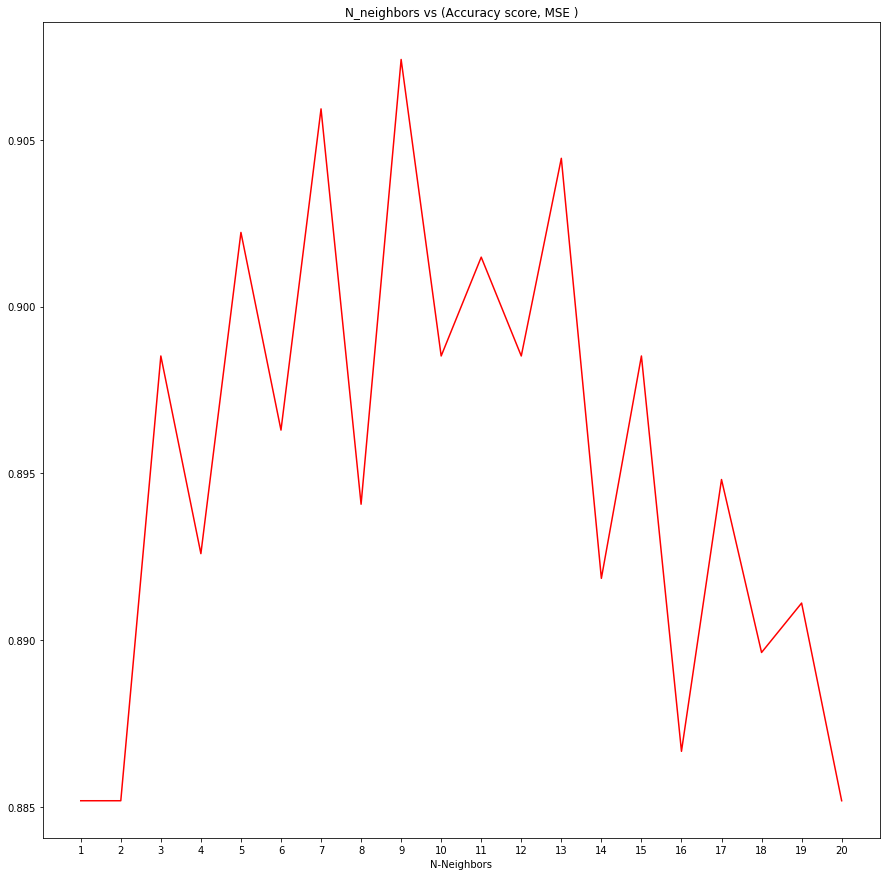

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


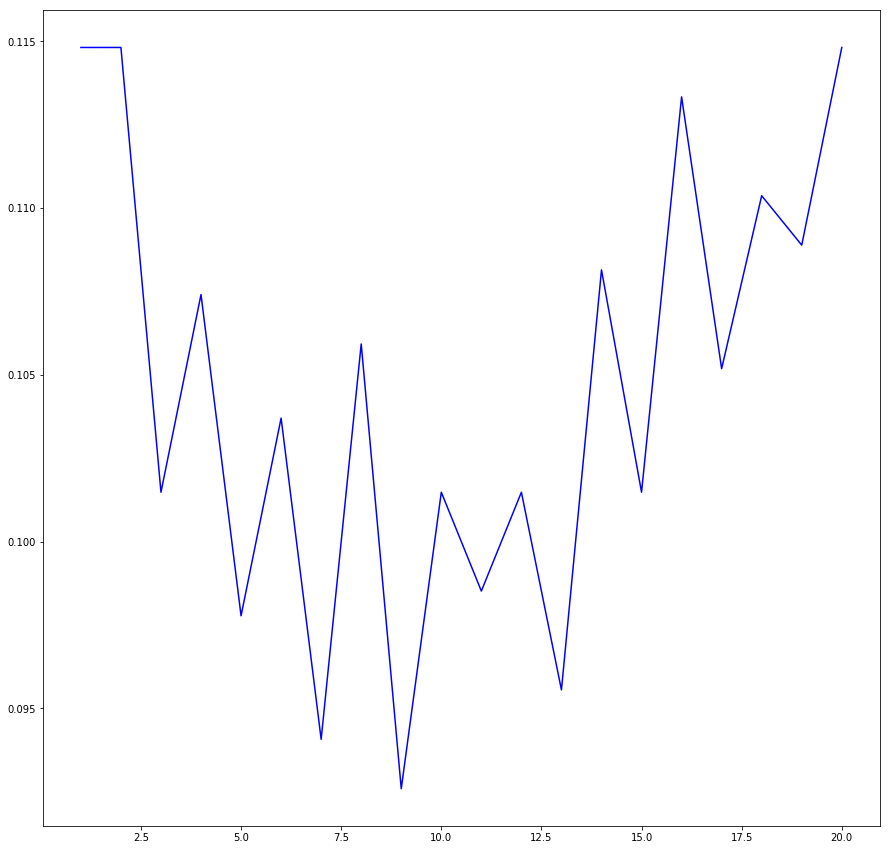

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
neighbors = np.arange(1,21,1)
accuracy =[]
errors = []
neighbors
for n in neighbors:
    clfKnn = KNeighborsClassifier(n_neighbors=n,p=2)
    model = clfKnn.fit(x_train,y_train)
    
    predicted = model.predict(x_test)
    model_accuracy = model.score(x_test,y_test)
    mse = mean_squared_error(predicted,y_test)
    accuracy.append(model_accuracy)
    errors.append(mse)

plt.rcParams['figure.figsize']=(15,15)
ax = plt.subplots()
plt.plot(neighbors,accuracy,color='red',label='Accuracy Score')
#plt.plot(neighbors,errors,color='blue',label='Mean Square Error')
plt.title('N_neighbors vs (Accuracy score, MSE )')
plt.xlabel('N-Neighbors')
plt.xticks(neighbors)
plt.show()
plt.plot(neighbors,errors,color='blue',label='Mean Square Error')
%time